In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [11]:
location = pd.read_csv("0915.csv")
location

,location_id,longitude,latitude,start_date,start_time,weekday,duration,speed,name1,name2,name3,name4,name5,category1,category2,category3,category4,category5
0,1,121.576000,24.986000,2020/07/22,11:00,4,NaN,NaN,myhome,myhome1,myhome2,myhome3,myhome4,c1,c2,c3,c4,c5
1,2,121.443000,24.433000,2020/07/23,12:00,5,NaN,NaN,apple,apple1,apple2,apple3,apple4,c1,c2,c3,c4,c5
2,3,121.123000,24.765000,2020/07/24,13:00\n,6,NaN,NaN,banana,banana1,banana2,banana3,banana4,c1,c2,c3,c4,c5
3,4,121.562949,25.087307,2020-09-10,00:25,5,0.0,-1.000000,軟訊資訊有限公司,Family Mart,阿華食堂,7-Eleven,小鳥不吃肉,electronics_store,convenience_store,restaurant,convenience_store,restaurant
4,5,121.562949,25.087307,2020-09-10,00:25,5,0.0,-1.000000,軟訊資訊有限公司,Family Mart,阿華食堂,7-Eleven,小鳥不吃肉,electronics_store,convenience_store,restaurant,convenience_store,restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,3139,121.576946,24.987183,2020-09-15,14:59,3,0.0,2.439125,NCCU College of Commerce,National Chengchi University,NCCU International MBA,Hilife,逸仙樓,university,university,point_of_interest,convenience_store,school
3139,3140,121.577937,24.987118,2020-09-15,15:05,3,0.0,-1.000000,National Chengchi University,滇味廚房,國立政治大學達賢圖書館,莊敬三舍,金鮨日式料理,university,restaurant,library,point_of_interest,restaurant
3140,3141,121.577796,24.988042,2020-09-15,15:05,3,0.0,-1.000000,National Chengchi University,國立政治大學達賢圖書館,滇味廚房,National Chengchi University (United Hospital),7-Eleven,university,library,restaurant,transit_station,convenience_store
3141,3142,121.576811,24.987780,2020-09-15,15:05,3,0.0,2.078221,Crêperie,永康街左撇子,佳佳影印店-論文/打字/紙張專賣,5 Cafe,全家便利商店 政富店,restaurant,restaurant,point_of_interest,bakery,convenience_store


In [35]:
df = pd.DataFrame({
    'x': location['longitude'],
    'y': location['latitude']
})
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

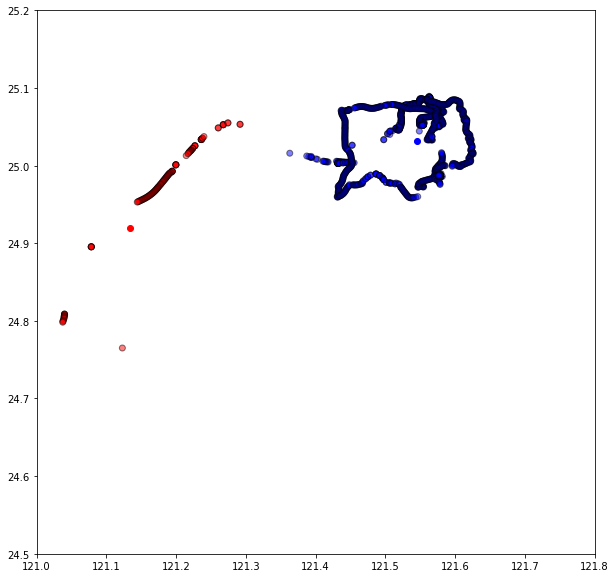

In [37]:
fig = plt.figure(figsize=(10,10))

colmap = {1:'r', 2:'g',3:'b', 4:'gray', 5:'cyan'}
colors = map(lambda x: colmap[x+1], labels)

plt.scatter(df['x'], df['y'], color=list(colors), alpha=0.5, edgecolor = 'k')
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])

plt.xlim(121.0,121.8)
plt.ylim(24.5,25.2)
plt.show()